In [26]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [28]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# 1. Find out how many males and females participated in the test.

In [29]:
total_female = df[df['gender']=='female']
total_female['gender'].count()

518

In [30]:
total_male = df[df['gender']=='male']
total_male['gender'].count()

482

In [31]:
d1 = {'Gender': ['Female','Male'],'Count':[total_female['gender'].count(),total_male['gender'].count()]}
d1 = pd.DataFrame(d1)
d1

,Gender,Count
0,Female,518
1,Male,482


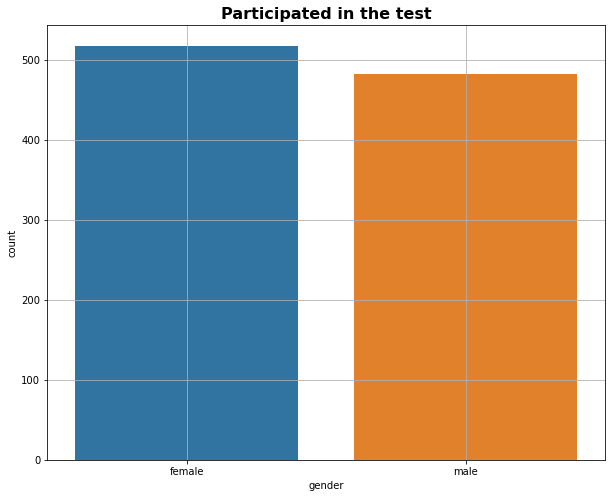

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(x='gender',data=df)
plt.title('Participated in the test',fontsize=16,fontweight='bold')
plt.grid()

Total 518 females and 482 males are participated in the test.

# 2. What do you think about the students' parental level of education?

In [33]:
ple = df.groupby('parental level of education')['gender'].count()
ple = pd.DataFrame(ple).reset_index()
ple.rename(columns = {'gender' : 'count'}, inplace = True)
ple

,parental level of education,count
0,associate's degree,222
1,bachelor's degree,118
2,high school,196
3,master's degree,59
4,some college,226
5,some high school,179


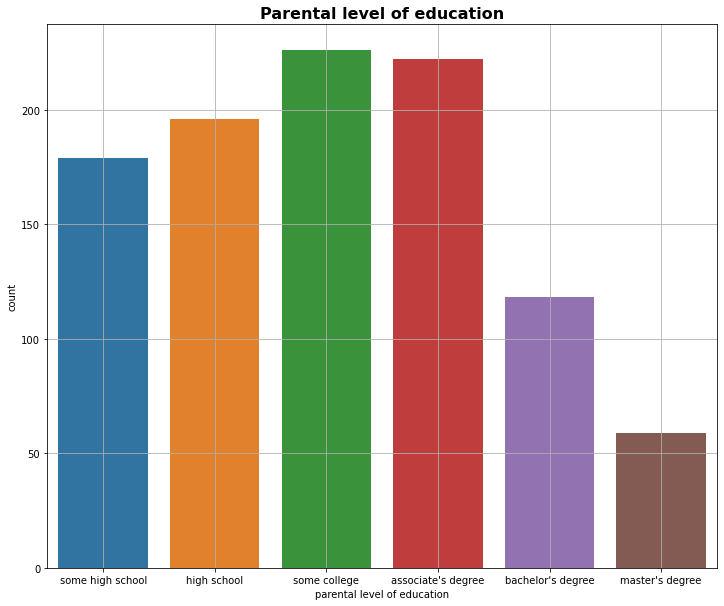

In [34]:
plt.figure(figsize=(12,10))
sns.countplot(x='parental level of education',data=df)
plt.title('Parental level of education',fontsize=16,fontweight='bold')
plt.grid()


From above visualization we can see that most of them have atlest college education. Total 1000 parents and about 625 of them have basic college education and above. The other 375 has a basic high school education.

# 3. Who scores the most on average for math, reading and writing based on


# Gender

In [40]:
math = df.groupby('gender')['math score'].mean()
read = df.groupby('gender')['reading score'].mean()
write = df.groupby('gender')['writing score'].mean()
s = {'Gender':['Female','Male'],'Math Score':[math['female'],math['male']],'Reading Score':[read['female'],read['male']],'Writing Score':[write['female'],write['female']]}
s = pd.DataFrame(s)
s

,Gender,Math Score,Reading Score,Writing Score
0,Female,63.376448,72.590734,72.467181
1,Male,68.821577,65.545643,72.467181


From the above table we can see that male scores most in math and female scores most in reading and writing.

# Test preparation course

In [41]:
m = df.groupby('test preparation course')['math score'].mean()
r = df.groupby('test preparation course')['reading score'].mean()
w = df.groupby('test preparation course')['writing score'].mean()
sc = {'test preparation course':['Completed','None'],'Math Score':[m['completed'],m['none']],'Reading Score':[r['completed'],r['none']],'Writing Score':[w['completed'],w['none']]}
sc = pd.DataFrame(sc)
sc


,test preparation course,Math Score,Reading Score,Writing Score
0,Completed,69.96648,74.175978,74.684358
1,None,63.78972,66.417445,64.457944


From the above dataset we can see that students which completed test preparation course has most score in math, reading and writing.

# 4. What do you think about the scoring variation for math, reading and writing based on

# Gender

In [42]:
mat = df.groupby('gender')['math score'].var()
rea = df.groupby('gender')['reading score'].var()
wri = df.groupby('gender')['writing score'].var()
sco = {'Gender':['Female','Male'],'Math Score':[mat['female'],mat['male']],'Reading Score':[rea['female'],rea['male']],'Writing Score':[wri['female'],wri['female']]}
sco = pd.DataFrame(sco)
sco

,Gender,Math Score,Reading Score,Writing Score
0,Female,256.958593,207.677438,220.369327
1,Male,211.889097,200.211010,220.369327


# Test preparation course

In [43]:
ma = df.groupby('test preparation course')['math score'].var()
re = df.groupby('test preparation course')['reading score'].var()
wr = df.groupby('test preparation course')['writing score'].var()
scor = {'test preparation course':['Completed','None'],'Math Score':[ma['completed'],ma['none']],'Reading Score':[re['completed'],re['none']],'Writing Score':[wr['completed'],wr['none']]}
scor = pd.DataFrame(scor)
scor

,test preparation course,Math Score,Reading Score,Writing Score
0,Completed,210.884027,183.265864,175.202612
1,None,246.668662,213.419851,226.251739


# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [45]:
top = df.nlargest(250,'math score')
top

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64


Here 250 students list were sorted from total 1000 students by the basis of there scores in math. Top scored 250 where selected.